In [4]:
import numpy as np
from fft_tdse_simulator.simulator import *
from fft_tdse_simulator.animator import *
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from scipy.special import erf

In [8]:
x_min = -40.0
x_max = 40.0
nx = 256

𝜇 = 1.0
𝑐 = 0.923+1.568*𝜇
𝛼 = 0.2411+1.405*𝜇

def fun(x, y, z):


    r2 = (x*x+y*y+z*z)
    r = r2**.5
    
    if r == 0:
        V0 = 𝜇
    else:
        V0 = erf(𝜇*r)/r
        
    return V0


    
def potential(x, y, z):

    r2 = (x*x+y*y+z*z)
    r = r2**.5

    V0 = np.vectorize(fun)(x, y, z)
        
    V = V0 + 𝑐*np.exp(-𝛼**2*r2)
    return -V


def guess(x, y, z):
    #return np.exp(-(x*x + y*y + z+z)/2)
    z0 = 20
    r2 = (x*x+y*y+(z-z0)*(z-z0))

    return np.exp(-r2/2)
          
    #return np.exp(-r2**.5)


In [12]:
sim = Simulator(verbose=True)
sim.set_dimension(3)
sim.set_potential(potential)
sim.set_grid([x_min]*3, [x_max]*3, [nx]*3)
sim.set_initial_condition(guess)
#sim.set_ground_state_grid(-50,50,512)
sim.set_time_parameters(0.0, 150.0, 15000)
#sim.ground_state_guess = guess(*sim.grid.xx)
#sim.wf.setPsi(sim.wf.psi * np.exp(1j*sim.x))

laser = LaserPulse(omega=0.25, t0=20.0, T=60.0, E0=0.0)
sim.set_laser_pulse(laser)

sim.prepare()
psi_init = sim.wf.psi.copy()


ic| message: 'Dimension set to 3'
ic| message: 'Initial condition set.'
ic| self.initial_psi_fun: <function guess at 0x362b62830>
ic| 'Time grid:'
ic| self.t0: 0.0, self.t1: 150.0, self.n_steps: 15000
ic| hasattr(self, 'gs'): False


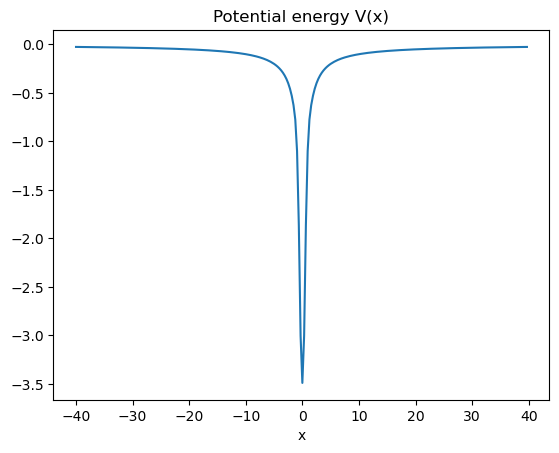

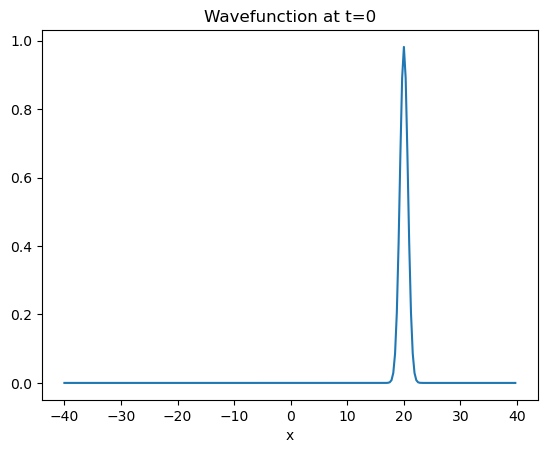

In [13]:
def density(psi):
    return np.einsum('ijk,ijk->k', psi.conj(), psi).real * sim.grid.dtau
    
plt.figure()
plt.plot(sim.grid.x[0],potential(sim.grid.x[0],0,0))
plt.xlabel('x')
plt.title('Potential energy V(x)')
plt.show()

plt.figure()
plt.plot(sim.grid.x[0],density(sim.psi))
plt.xlabel('x')
plt.title('Wavefunction at t=0')
plt.show()

In [14]:
sim.simulate()

ic| 'Running simulation...'


  0%|          | 0/15000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
anim = Animator1d(sim)

anim.set_interval(20)
anim.set_framesize(1024, 768)
anim.xlim = [-200,200]


anim_callback = anim.get_callback()

def callback(sim):
    anim_callback(sim)
    
sim.simulate(callback=callback)
anim.make_movie("atom_3d.mp4")
anim.clean_frames()


In [ ]:
help(LaserPulse)